In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
os.chdir(r'/content/drive/My Drive/DeepfakeDetector')

In [0]:
from google.colab import files
token = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [0]:
!cp kaggle.json /root/.kaggle/

In [0]:
# downlaod the kaggle dataset using kaggle api and unzip images into data folder
# !kaggle datasets download -d dagnelies/deepfake-faces

 99% 427M/433M [00:04<00:00, 107MB/s]
100% 433M/433M [00:04<00:00, 109MB/s]


In [67]:
!unzip -o 'deepfake-faces.zip' -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/faces_224/yppybofyww.jpg  
  inflating: data/faces_224/ypqjxdwawy.jpg  
  inflating: data/faces_224/ypqsxalhkw.jpg  
  inflating: data/faces_224/ypqxbbydxe.jpg  
  inflating: data/faces_224/ypqzrivawi.jpg  
  inflating: data/faces_224/yprdarrkit.jpg  
  inflating: data/faces_224/yprhthcacq.jpg  
  inflating: data/faces_224/yprmkhffdi.jpg  
  inflating: data/faces_224/yprnmqkhga.jpg  
  inflating: data/faces_224/yprqkgcoid.jpg  
  inflating: data/faces_224/yprsoygtjn.jpg  
  inflating: data/faces_224/yprxcbpmaj.jpg  
  inflating: data/faces_224/yprxtgidkk.jpg  
  inflating: data/faces_224/ypsbicsrsf.jpg  
  inflating: data/faces_224/ypsfvpanpn.jpg  
  inflating: data/faces_224/ypsgzbgbaz.jpg  
  inflating: data/faces_224/ypskfnxajx.jpg  
  inflating: data/faces_224/ypskxfumwo.jpg  
  inflating: data/faces_224/ypslvqfsrd.jpg  
  inflating: data/faces_224/ypsmruzzyt.jpg  
  inflating: data/faces_224/ypsqgodnrn.jpg  
  in

In [0]:
# Install OpenCV
# !pip install opencv-contrib-python
# !pip install numpy

import keras
from keras import optimizers
from keras.datasets import mnist
from keras.applications import VGG16, VGG19, InceptionResNetV2, Xception, NASNetLarge
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import cv2

import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

import numpy as np
import csv
import glob
import random
import math

# !wget https://raw.githubusercontent.com/archarbar/DeepfakeDetector/master/metadata.csv

In [117]:
# read metadata file to create label list
dataset_filename = 'metadata.csv'
with open(dataset_filename) as csv_file:
  csv_reader = csv.reader(csv_file)
  colnames = next(csv_reader)
  data = list(csv_reader)

for label in random.sample(data, 10):
  print(label)

random.shuffle(data)

X = [] #features
y = [] #labels

fake = 0
real = 0

#create features and labels lists.
# append image path (change .mp4 extension to jpg) and append classes
for element in data[:500]:
  element[0] = 'data/faces_224/' + element[0][:-3] + 'jpg'
  if (element[3] == 'FAKE'):
    X.append(element[0])
    y.append(0)
    fake += 1
  else:
    X.append(element[0])
    y.append(1)
    real +=1

#calculating class balance
print(100*fake/len(y))
print(100*real/len(y))

print(len(X))
print(len(y))

# The size of the images
IMG_SIZE = 224

# use open cv to read and resize images into arrays
for c, v in enumerate(X):
  img_array = cv2.imread(v)
  if (img_array is None):
    print("error image not found: ", v)
  X[c] = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

# Creating pickle files to save features and classes
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

['csgnemklmq.mp4', '107', '107', 'FAKE', 'irdptfgpbb.mp4']
['eiwopxzjfn.mp4', '223', '223', 'FAKE', 'xzvrgckqkz.mp4']
['sagffcencu.mp4', '107', '107', 'FAKE', 'lscyoslzbs.mp4']
['jbplnqxfbw.mp4', '185', '186', 'FAKE', 'ydfcqqrcbv.mp4']
['mlzdswsaxa.mp4', '267', '267', 'REAL', '']
['idsupeszcp.mp4', '129', '129', 'FAKE', 'rktrpsdlci.mp4']
['rqiusjgyuw.mp4', '154', '155', 'FAKE', 'qhfkfabfxh.mp4']
['prauyhlmgw.mp4', '90', '89', 'FAKE', 'aieqhlrbev.mp4']
['ilcxskqhce.mp4', '223', '223', 'FAKE', 'qknqbyxfaj.mp4']
['skltusseol.mp4', '155', '155', 'FAKE', 'rfngbcfwqt.mp4']
84.4
15.6
500
500
(500, 224, 224, 3) (500,)


(400, 224, 224, 3) (400,)
(100, 224, 224, 3) (100,)
Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 41s 102ms/step - loss: 0.5741 - acc: 0.8150 - val_loss: 0.4384 - val_acc: 0.8600
Epoch 2/20
400/400 [==============================] - 41s 102ms/step - loss: 0.4983 - acc: 0.8400 - val_loss: 0.4288 - val_acc: 0.8600
Epoch 3/20
400/400 [==============================] - 38s 95ms/step - loss: 0.4638 - acc: 0.8400 - val_loss: 0.4236 - val_acc: 0.8600
Epoch 4/20
400/400 [==============================] - 38s 95ms/step - loss: 0.4532 - acc: 0.8400 - val_loss: 0.4109 - val_acc: 0.8600
Epoch 5/20
400/400 [==============================] - 38s 95ms/step - loss: 0.4486 - acc: 0.8400 - val_loss: 0.4378 - val_acc: 0.8600
Epoch 6/20
400/400 [==============================] - 40s 100ms/step - loss: 0.4402 - acc: 0.8400 - val_loss: 0.4065 - val_acc: 0.8600
Epoch 7/20
400/400 [==============================] - 37s 93ms/step - loss: 0.4268 - acc: 0.840

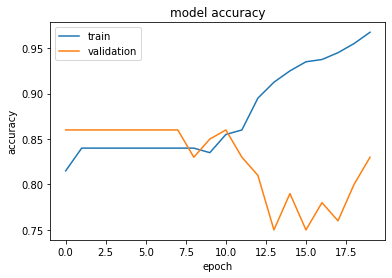

In [119]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (pixel is from 0 to 255)
X = X/255.0

#method for splitting train and test datasets
def train_test_split(X, y, train_size):
  X_train = X[:math.floor(train_size*len(X))]
  X_test = X[math.floor(train_size*len(X)):]
  y_train = y[:math.floor(train_size*len(y))]
  y_test = y[math.floor(train_size*len(y)):]
  return (X_train, X_test, y_train, y_test)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
# sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

#splitting into train and test sets, with a 80% split
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.8)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

# Training the model, with 20 iterations
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')